<a href="https://colab.research.google.com/github/MuchammadAliRosyidi/DataMining/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [20]:
dataset = pd.read_csv("marvel-unimodal-edges.csv")

In [21]:
dataset.head()

,Source,Target,Weight
0,Black Panther / T'chal,Loki [asgardian],10
1,Black Panther / T'chal,Mantis / ? Brandt,23
2,Black Panther / T'chal,Iceman / Robert Bobby,12
3,Black Panther / T'chal,Marvel Girl / Jean Grey,10
4,Black Panther / T'chal,Cyclops / Scott Summer,14


In [22]:
le_source = LabelEncoder()
le_target = LabelEncoder()

In [23]:
dataset['Source'] = le_source.fit_transform(dataset['Source'])
dataset['Target'] = le_target.fit_transform(dataset['Target'])

In [24]:
X = dataset[['Source', 'Target']]
y = dataset['Weight']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [28]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
print("Akurasi:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Akurasi: 0.0853966649823143
Confusion Matrix:
 [[92 52 46 ...  0  0  0]
 [74 33 34 ...  0  0  0]
 [65 26 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           5       0.14      0.33      0.19       282
           6       0.10      0.16      0.12       207
           7       0.05      0.10      0.07       153
           8       0.05      0.06      0.06       125
           9       0.05      0.05      0.05       124
          10       0.05      0.04      0.04       104
          11       0.07      0.06      0.06        88
          12       0.05      0.04      0.04        85
          13       0.02      0.02      0.02        66
          14       0.03      0.02      0.02        60
          15       0.00      0.00      0.00        46
          16       0.06      0.03      0.04        40
          17       0.00      0.00      0.00        40
          18    

In [30]:
print("\n=== Clustering K-Means ===")
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)



=== Clustering K-Means ===


KMeans(n_clusters=5, random_state=42)

In [31]:
dataset['Cluster'] = kmeans.labels_

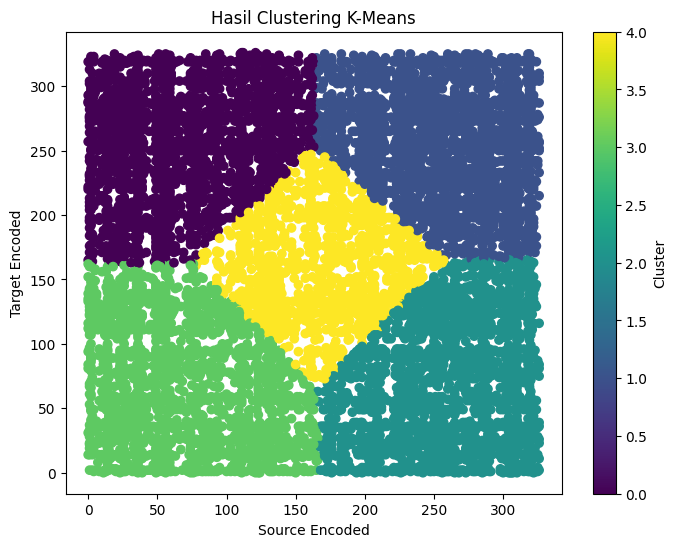

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Source'], dataset['Target'], c=dataset['Cluster'], cmap='viridis', marker='o') # Changed df to dataset
plt.title('Hasil Clustering K-Means')
plt.xlabel('Source Encoded')
plt.ylabel('Target Encoded')
plt.colorbar(label='Cluster')
plt.show()